Questão 2

(531, 573, 3)


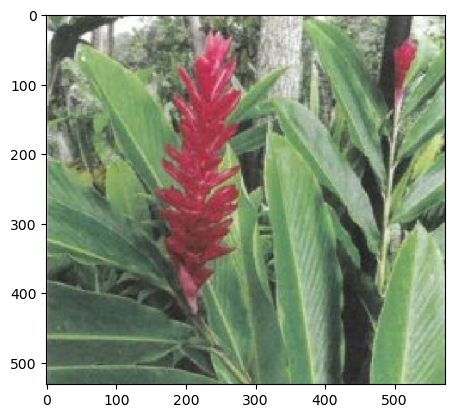

In [56]:
import cv2 as cv
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import random

# img = cv.imread('Alpinia-purpurata-2.jpg')
img = cv.imread('gonzalez-flower.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

print(img.shape)
plt.imshow(img)

In [57]:
vectorized = img.reshape((-1,3))
# vectorized = np.float32(vectorized)
vectorized.shape

(304263, 3)

In [61]:
def kmeans(z_set, k_clusters, max_iterations):
    #As centroides(mean_vector) iniciais são pegas do conjuto z aleatoriamente 
    centroids = [random.choice(z_set) for _ in range(k_clusters)]
    # centroids = np.array(centroids)

    clustered_groups = [[] for _ in range(k_clusters)]
    labels = [None for _ in range(len(z_set))]
    # labels = np.array(labels)
    
    for _ in range(max_iterations):
        for point_index, point in enumerate(z_set):
            lowest_centroid_distance = float('inf')
            lowest_centroid_index = None

            for centroid_idx, centroid in enumerate(centroids):
                dist = np.linalg.norm(centroid - point)

                if dist < lowest_centroid_distance:
                    lowest_centroid_distance = dist
                    lowest_centroid_index = centroid_idx

            clustered_groups[lowest_centroid_index].append(point)
            labels[point_index] = [lowest_centroid_index]

        #Acha os novos centroids
        centroids = [np.mean(cluster, axis=0) for cluster in clustered_groups]
        
    # print(centroids)
    return (np.array(labels), np.array(centroids))

In [62]:
# result = kmeans(vectorized[0:20], 2, 10)
labels, centroids = kmeans(vectorized, 3, 10)

print(labels.shape)

(304263, 1)


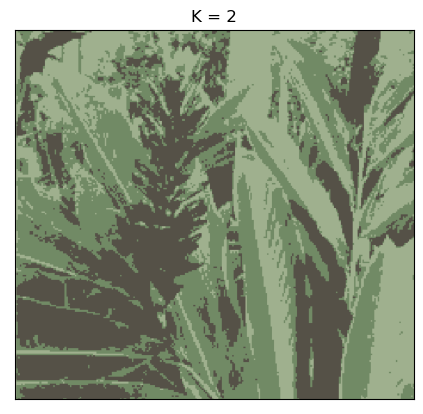

In [63]:
res = centroids[labels.flatten()]

res = np.uint8(res)
result_image = res.reshape((img.shape))

# plt.subplot(2, 2, 4)
plt.imshow(result_image)
plt.title('K = ' + str(2))
plt.xticks([])
plt.yticks([])
plt.show()